In [16]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [21]:
# Load the iris dataset
df = pd.read_csv("./iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# To know number of rows and collumns
df.shape

(150, 6)

In [23]:
# To find if any null value is present
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
#findout unique classification/type of iris flower.
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
#findout no of rows for each Species.
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


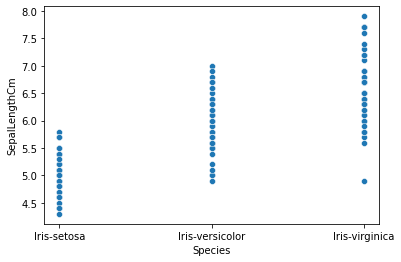

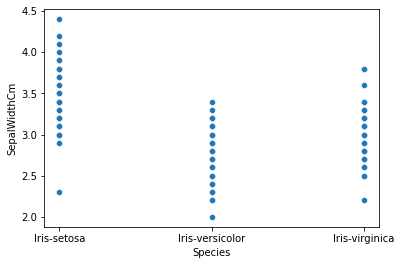

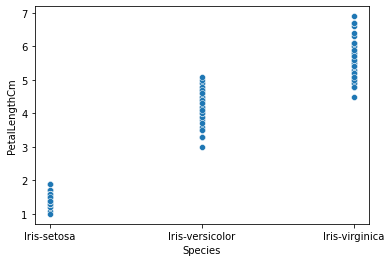

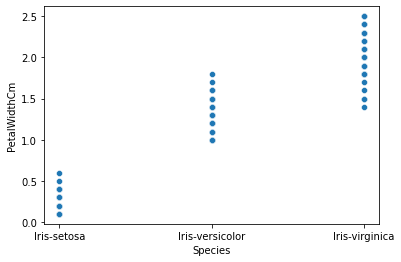

In [46]:
# To find outliers
cols = df.iloc[:,1:5]
for i in cols:
    sns.scatterplot(x="Species",y=df[i],data=df)
    plt.show()

In [50]:
# To remove outliers from 'sepal width (cm)'
q1 = df["SepalWidthCm"].quantile(0.25)
q3 = df["SepalWidthCm"].quantile(0.75)
iqr = q3 - q1
df = df[(df["SepalWidthCm"] >= q1-1.5*iqr) & (df["SepalWidthCm"] <= q3+1.5*iqr)]
df.shape # To find out the number of rows and column after outlier treatment

(146, 6)

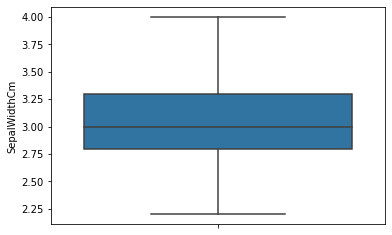

In [52]:
# Blocplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['SepalWidthCm'])
plt.show()

In [53]:
#Now we select all four features of the dataset in a variable called x so that we can train our model with these features.
x = df.iloc[:, [0,1,2,3]].values

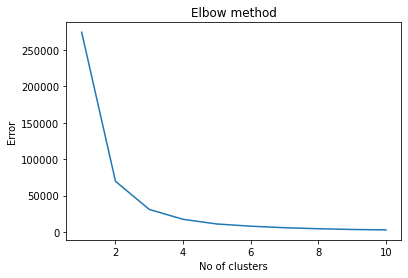

In [54]:
#Elbow method, which is designed to help find the optimal number of clusters in a dataset
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [59]:
#The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.
k_means=KMeans(n_clusters=3)
y_kmeans=k_means.fit_predict(x)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [60]:
k_means.cluster_centers_

array([[ 74.7755102 ,   5.94081633,   2.79591837,   4.22040816],
       [125.        ,   6.57058824,   2.97058824,   5.52352941],
       [ 24.82608696,   4.97608696,   3.3673913 ,   1.46521739]])

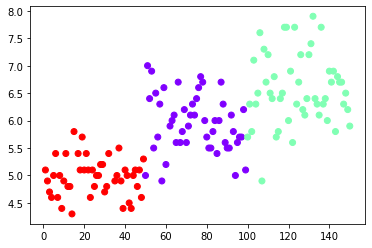

In [62]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans,cmap="rainbow")